In [4]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00


**Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set dataset path
dataset_path = '/content/drive/My Drive/Number Plates Detection/Dataset'
yaml_path = f"{dataset_path}/data.yaml"

**Training**

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a YOLOv8 model (nano is fast; use 's' or 'm' for more accuracy)
model = YOLO("yolov8n.pt")  # fast nano model
model.train(
    data=yaml_path,
    epochs=20,
    imgsz=416,
    batch=8,
    name="yolov8_license_plate",
    device='0'  # force GPU
)

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Number Plates Detection/Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_license_plate, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

100%|██████████| 755k/755k [00:00<00:00, 3.40MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 14.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.1 MB/s, size: 64.9 KB)


train: Scanning /content/drive/My Drive/Number Plates Detection/Dataset/train/labels.cache... 1328 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1328/1328 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.1 MB/s, size: 52.1 KB)


val: Scanning /content/drive/My Drive/Number Plates Detection/Dataset/valid/labels.cache... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_license_plate/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_license_plate
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      0.48G      1.509      1.978      1.265         19        416: 100%|██████████| 166/166 [13:23<00:00,  4.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.72it/s]


                   all        237        238      0.862      0.861      0.901      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.588G      1.565      1.414      1.317         18        416: 100%|██████████| 166/166 [00:20<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.44it/s]


                   all        237        238      0.871      0.848      0.912      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.588G      1.547      1.283      1.335         12        416: 100%|██████████| 166/166 [00:20<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.31it/s]

                   all        237        238      0.867       0.79      0.872      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.588G       1.54      1.166      1.321         12        416: 100%|██████████| 166/166 [00:22<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.17it/s]

                   all        237        238      0.943      0.904      0.938      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.588G      1.523      1.115      1.308         15        416: 100%|██████████| 166/166 [00:21<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.90it/s]

                   all        237        238      0.924      0.895      0.935      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.602G      1.491      1.058      1.267          8        416: 100%|██████████| 166/166 [00:20<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.25it/s]

                   all        237        238      0.923      0.953      0.968      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.604G      1.452     0.9522      1.247         10        416: 100%|██████████| 166/166 [00:22<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.07it/s]

                   all        237        238      0.956      0.966      0.971      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.619G      1.412     0.9126      1.242         16        416: 100%|██████████| 166/166 [00:22<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.34it/s]

                   all        237        238      0.962      0.954      0.968      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.619G       1.39     0.8752      1.231         17        416: 100%|██████████| 166/166 [00:20<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.73it/s]

                   all        237        238      0.979       0.96      0.978      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.619G      1.395     0.8669      1.216         10        416: 100%|██████████| 166/166 [00:21<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.48it/s]

                   all        237        238      0.975      0.941       0.98      0.565


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.619G      1.346     0.7917      1.221          8        416: 100%|██████████| 166/166 [00:22<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.36it/s]

                   all        237        238      0.967      0.962      0.968      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.619G      1.297     0.7424      1.195          8        416: 100%|██████████| 166/166 [00:20<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.28it/s]

                   all        237        238      0.979      0.967      0.977      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.637G      1.279     0.7051       1.19          8        416: 100%|██████████| 166/166 [00:20<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.14it/s]

                   all        237        238      0.986      0.966      0.974      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.652G       1.27     0.6839      1.174          7        416: 100%|██████████| 166/166 [00:21<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.25it/s]

                   all        237        238      0.979      0.962      0.976      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      0.67G      1.253     0.6431      1.172         11        416: 100%|██████████| 166/166 [00:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


                   all        237        238      0.987      0.958      0.981      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.688G      1.209      0.627      1.147          8        416: 100%|██████████| 166/166 [00:20<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.31it/s]

                   all        237        238      0.987      0.965      0.977      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.688G      1.192     0.5982      1.129          8        416: 100%|██████████| 166/166 [00:21<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.52it/s]

                   all        237        238      0.991      0.976      0.986       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.688G      1.189     0.5911      1.129          7        416: 100%|██████████| 166/166 [00:20<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]

                   all        237        238      0.979      0.977      0.985      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.688G      1.146     0.5639      1.112          9        416: 100%|██████████| 166/166 [00:20<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.49it/s]

                   all        237        238      0.968      0.966      0.978      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.688G       1.13     0.5503      1.103          8        416: 100%|██████████| 166/166 [00:21<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  8.34it/s]

                   all        237        238      0.979      0.966      0.978      0.602



20 epochs completed in 0.349 hours.
Optimizer stripped from runs/detect/yolov8_license_plate/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_license_plate/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_license_plate/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.65it/s]


                   all        237        238      0.979      0.967      0.978      0.602
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/yolov8_license_plate


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f557e659b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**Validation**

In [ ]:
# Validate on the validation set
metrics = model.val()

# Print mAP and other metrics
print(metrics)

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.2±4.2 ms, read: 10.7±9.3 MB/s, size: 45.7 KB)


val: Scanning /content/drive/My Drive/Number Plates Detection/Dataset/valid/labels.cache... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:02<00:00, 12.33it/s]


                   all        237        238      0.979      0.966      0.978        0.6
Speed: 0.7ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov8_license_plate2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f557dd8c5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.0

**Testing**

In [ ]:
# Evaluate on test set
metrics = model.val(
    data="/content/drive/My Drive/Number Plates Detection/Dataset/data.yaml",
    split='test'
)

# Extract metrics from .box (which is a Metric object)
mean_precision = metrics.box.p.mean()
mean_recall = metrics.box.r.mean()
map_50 = metrics.box.map50
map_50_95 = metrics.box.map

# Print nicely
print("Validation metrics on test set:")
print(f"Precision     : {mean_precision:.4f}")
print(f"Recall        : {mean_recall:.4f}")
print(f"mAP@0.5       : {map_50:.4f}")
print(f"mAP@0.5:0.95  : {map_50_95:.4f}")

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 1.1±0.7 ms, read: 21.9±1.8 MB/s, size: 29.7 KB)


val: Scanning /content/drive/My Drive/Number Plates Detection/Dataset/test/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]


                   all         56         56      0.999          1      0.995      0.837
Speed: 1.9ms preprocess, 5.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/yolov8_license_plate5
Validation metrics on test set:
Precision     : 0.9988
Recall        : 1.0000
mAP@0.5       : 0.9950
mAP@0.5:0.95  : 0.8372


**Saving Model**

In [ ]:
# Save best.pt to Drive for future use
!cp /content/runs/detect/yolov8_license_plate/weights/best.pt "/content/drive/My Drive/Number Plates Detection/Code/YOLOv8n.pt"
print("Model Saved Successfuly")

Model Saved Successfuly


**Loading saved model & making Predictions**

In [6]:
# Path to the saved model
Model_Path = "/content/drive/My Drive/Number Plates Detection/Code/YOLOv8n.pt"
# Load the model
Saved_Model = YOLO(Model_Path)


image 1/1 /content/drive/My Drive/Number Plates Detection/Dataset/sample/sample3.jpg: 256x416 1 licence-plate, 9.3ms
Speed: 1.1ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict4


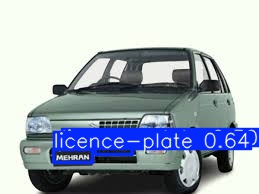

In [ ]:
# Provide a test image path (you can change this to your image)
image_path = "/content/drive/My Drive/Number Plates Detection/Dataset/sample/sample3.jpg"
# Run prediction
results = Saved_Model.predict(source=image_path, conf=0.25, save=True)

from IPython.display import Image, display
import glob
predicted_image = glob.glob("runs/detect/predict/*.jpg")[0]
display(Image(filename=predicted_image))

In [8]:
# Predict on a Folder of Images
Saved_Model.predict(
    source="/content/drive/My Drive/Number Plates Detection/Dataset/sample/",
    conf=0.25,
    save=True,
    name="batch_predictions"
)
!cp -r /content/runs/detect/batch_predictions/* "/content/drive/My Drive/Number Plates Detection/Dataset/sample/ResultsYolov8"


image 1/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0968.JPG: 384x416 1 licence-plate, 9.4ms
image 2/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0969.JPG: 352x416 1 licence-plate, 8.0ms
image 3/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0970.JPG: 384x416 1 licence-plate, 8.1ms
image 4/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0971.JPG: 384x416 1 licence-plate, 13.1ms
image 5/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0971x.jpg: 416x416 1 licence-plate, 7.9ms
image 6/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0973.JPG: 384x416 1 licence-plate, 7.9ms
image 7/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0973x.jpg: 352x416 1 licence-plate, 7.9ms
image 8/67 /content/drive/My Drive/Number Plates Detection/Dataset/sample/DSC_0975.JPG: 416x320 1 licence-plate, 8.9ms
image 9/67 /content/drive/My Drive/Number Pl